# バックテスト検証ノート

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [3]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [4]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [5]:
bt = Backtesting(timestamp)

In [6]:
df_ex1 = bt.get_coincheck_df()
df_ex2 = bt.get_liquid_df()

In [7]:
len(df_ex1), len(df_ex2)

(22070, 22070)

## テスト実行

In [8]:
bt.run(amount=0.009, profit_margin_threshold=2000, profit_margin_diff=800)

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2020-03-25 03:54:00,coincheck,liquid,BTC/JPY,0.009,9
1,2020-03-25 03:54:59,liquid,coincheck,BTC/JPY,0.009,0
2,2020-03-25 04:15:15,coincheck,liquid,BTC/JPY,0.009,12
3,2020-03-25 04:15:26,liquid,coincheck,BTC/JPY,0.009,-3
4,2020-03-25 04:16:53,coincheck,liquid,BTC/JPY,0.009,10
...,...,...,...,...,...,...
97,2020-03-25 10:06:06,coincheck,liquid,BTC/JPY,0.009,-2
98,2020-03-25 10:10:32,liquid,coincheck,BTC/JPY,0.009,9
99,2020-03-25 10:11:24,coincheck,liquid,BTC/JPY,0.009,-1
100,2020-03-25 10:12:54,liquid,coincheck,BTC/JPY,0.009,9


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2020-03-25 03:54:00,買い,coincheck,742980.0
1,2020-03-25 03:54:00,売り,liquid,744006.0
2,2020-03-25 03:54:59,買い,liquid,743615.0
3,2020-03-25 03:54:59,売り,coincheck,743574.0
4,2020-03-25 04:15:15,買い,coincheck,739987.0
...,...,...,...,...
199,2020-03-25 10:11:24,売り,liquid,742803.0
200,2020-03-25 10:12:54,買い,liquid,742070.0
201,2020-03-25 10:12:54,売り,coincheck,743148.0
202,2020-03-25 10:14:57,買い,coincheck,742480.0


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
+---------------------+---------------------+
|          レコード数 |               22070 |
+---------------------+---------------------+
|            取引回数 |                 102 |
+---------------------+---------------------+
|            開始日時 | 2020-03-25 03:37:38 |
+---------------------+---------------------+
|            終了日時 | 2020-03-25 10:18:20 |
+---------------------+---------------------+
|         取引時間[H] |     0 days 06:40:42 |
+---------------------+---------------------+
|       取引単位[BTC] |               0.009 |
+---------------------+---------------------+
|   利確しきい値[JPY] |                1000 |
+---------------------+---------------------+
| 損切りマージン[JPY] |                 800 |
+---------------------+---------------------+

バックテスト結果
+-------------+---------+
| 開始[JPY]   |   10000 |
+-------------+---------+
| 終了[JPY]   |   10498 |
+-------------+---------+
| 利益[JPY]   |     498 |
+-------------+---------+
| 開始[BTC]   |   0.022 |
+-------------+---------+
| 終了[BTC]  

## グラフ出力

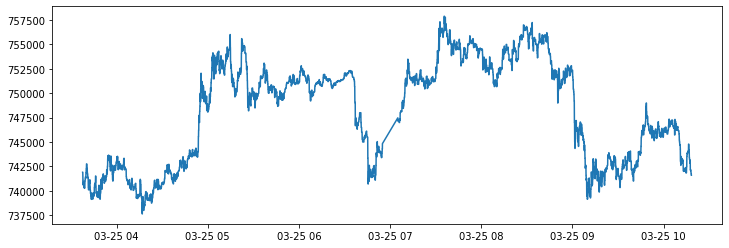

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_ex1.index, df_ex1['bid'])

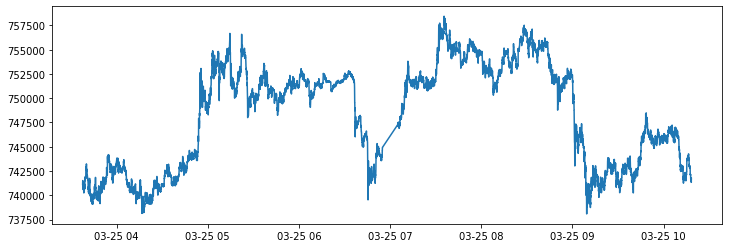

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_ex2.index, df_ex2['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_ex1.index),
    "buy_coincheck_sell_liquid": df_ex2.reset_index().bid - df_ex1.reset_index().ask,
    "buy_liquid_sell_coincheck": df_ex1.reset_index().bid - df_ex2.reset_index().ask,
    'coincheck_bid': df_ex1.reset_index().bid,
     'liquid_ask': df_ex2.reset_index().ask,
    'liquid_bid': df_ex2.reset_index().bid,
    'coincheck_ask': df_ex1.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_coincheck_sell_liquid,buy_liquid_sell_coincheck,coincheck_bid,liquid_ask,liquid_bid,coincheck_ask
timestamp,,,,,,
2020-03-25 03:30:00,-155,-575,740973,741549,741305,741461
2020-03-25 03:40:00,-269,-423,740223,740646,740420,740690
2020-03-25 03:50:00,-168,-449,742059,742508,742311,742479
2020-03-25 04:00:00,-312,-431,741925,742356,742157,742469
2020-03-25 04:10:00,-150,-511,739665,740176,739973,740123
2020-03-25 04:20:00,-133,-503,740026,740529,740358,740491
2020-03-25 04:30:00,-229,-425,741561,741986,741767,741996
2020-03-25 04:40:00,-253,-379,742946,743325,743135,743388
2020-03-25 04:50:00,-185,-590,747256,747846,747569,747755
